### 数据集来源
该数据集来源为heywhale网站的二手房价数据集

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 画图的主题设计
sns.set_theme()
sns.set_context('notebook')
plt.rcParams['font.family'] = 'Microsoft YaHei'
import warnings
warnings.filterwarnings('ignore')

### 读取数据

In [2]:
df = pd.read_csv(r"D:\BaiduNetdiskDownload\数据分析\house_price.csv")
df.head()

,房源标题,城市,城市等级,小区,户型,面积,楼层位置,朝向,建房时间,楼房位置,单价,总价
0,"全南两房,全明户型,满五年唯1??,诚意出售",上海,一线,东方剑桥,2室2厅,103.87㎡,低层 （共36层）,南向,2000年建,新华路,142485元/㎡,1480万
1,"近日月光,新天地等商场旁海华旁电梯房全明户型",上海,一线,大同花园南区,2室2厅,108.91㎡,中层 （共27层）,南向,1999年建,打浦桥,127628元/㎡,1390万
2,"主卧朝南,采光充足,中式风格,配套完善",上海,一线,海滨八村,2室1厅,60.73㎡,顶层 （共6层）,南向,1986年建,淞宝,33591元/㎡,204万
3,"Good房各付个税,靠缤谷,地铁100米,配套齐全",上海,一线,天山星城,3室2厅,105.88㎡,低层 （共15层）,南向,2006年建,天山,112391元/㎡,1190万
4,徐家汇ITC旁+烫金地段+交通便利+配套好,上海,一线,乐山大楼,2室1厅,62.28㎡,中层 （共24层）,南向,1991年建,徐家汇,118497元/㎡,738万


### 预处理
- 缺失值处理
- 重复值处理

In [3]:
### 查看有无缺失值
df.isnull().sum()

房源标题    0
城市      0
城市等级    0
小区      0
户型      0
面积      0
楼层位置    0
朝向      0
建房时间    0
楼房位置    0
单价      0
总价      0
dtype: int64

In [4]:
# 查看有无重复值
df.duplicated().sum()

1568

In [5]:
#查看重复值数据
df_dup = df[df.duplicated()]
# 查看其中某一条具体的重复值
df_dup.query('城市 =="上海" and 小区 =="东二小区"')

,房源标题,城市,城市等级,小区,户型,面积,楼层位置,朝向,建房时间,楼房位置,单价,总价
48,稀有带天井18平!低于市场价50急售!中老年人居住佳选,上海,一线,东二小区,2室1厅,66.82㎡,底层 （共6层）,南北向,1996年建,金桥,49386元/㎡,330万
532,稀有带天井18平!低于市场价50急售!中老年人居住佳选,上海,一线,东二小区,2室1厅,66.82㎡,底层 （共6层）,南北向,1996年建,金桥,49386元/㎡,330万


In [6]:
# 删除重复值并保留出现的第一条数据
df.drop_duplicates(keep='first', inplace=True)

### 查看数据类型

In [7]:
df.dtypes

房源标题    object
城市      object
城市等级    object
小区      object
户型      object
面积      object
楼层位置    object
朝向      object
建房时间    object
楼房位置    object
单价      object
总价      object
dtype: object

In [8]:
# 将面积、单价、总价设置为float
for i in ['面积','总价']:
    df[i] = df[i].apply(lambda x:float(x[:-1]))

df['单价'] = df['单价'].apply(lambda x:float(x[:-3]))
# 建房时间设置为日期型
df['建房时间'] = pd.to_datetime(df['建房时间'].apply(lambda x:x[:-2]))
df['建房时间']  = df['建房时间'].dt.year

# 获取楼层位置
df['楼层位置'] = df['楼层位置'].apply(lambda x:x.split('（')[0]) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30965 entries, 0 to 32532
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   房源标题    30965 non-null  object 
 1   城市      30965 non-null  object 
 2   城市等级    30965 non-null  object 
 3   小区      30965 non-null  object 
 4   户型      30965 non-null  object 
 5   面积      30965 non-null  float64
 6   楼层位置    30965 non-null  object 
 7   朝向      30965 non-null  object 
 8   建房时间    30965 non-null  int64  
 9   楼房位置    30965 non-null  object 
 10  单价      30965 non-null  float64
 11  总价      30965 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.1+ MB


In [10]:
df.describe()

,面积,建房时间,单价,总价
count,30965.000000,30965.000000,30965.000000,30965.000000
mean,112.869586,2010.531536,47258.387114,607.458274
std,63.347535,8.613420,36081.722625,814.938390
min,10.000000,1909.000000,3424.000000,13.000000
25%,80.600000,2005.000000,18715.000000,172.000000
50%,97.000000,2012.000000,37222.000000,335.000000
75%,130.000000,2017.000000,65104.000000,690.000000
max,2200.000000,2025.000000,362637.000000,15000.000000


### 业务分析
明确分析目标 -> 用数据解决什么问题

In [12]:
df.head()

,房源标题,城市,城市等级,小区,户型,面积,楼层位置,朝向,建房时间,楼房位置,单价,总价
0,"全南两房,全明户型,满五年唯1??,诚意出售",上海,一线,东方剑桥,2室2厅,103.87,低层,南向,2000,新华路,142485.0,1480.0
1,"近日月光,新天地等商场旁海华旁电梯房全明户型",上海,一线,大同花园南区,2室2厅,108.91,中层,南向,1999,打浦桥,127628.0,1390.0
2,"主卧朝南,采光充足,中式风格,配套完善",上海,一线,海滨八村,2室1厅,60.73,顶层,南向,1986,淞宝,33591.0,204.0
3,"Good房各付个税,靠缤谷,地铁100米,配套齐全",上海,一线,天山星城,3室2厅,105.88,低层,南向,2006,天山,112391.0,1190.0
4,徐家汇ITC旁+烫金地段+交通便利+配套好,上海,一线,乐山大楼,2室1厅,62.28,中层,南向,1991,徐家汇,118497.0,738.0


那个城市二手平均单价更高

In [13]:
tmp = df.groupby('城市')['单价'].mean().reset_index(name='均价')
tmp['均价'] = round(tmp['均价'],2)
tmp

,城市,均价
0,上海,74109.36
1,北京,91263.55
2,南京,36656.05
3,广州,54108.76
4,成都,16036.51
5,杭州,45654.73
6,武汉,18617.39
7,深圳,70604.00


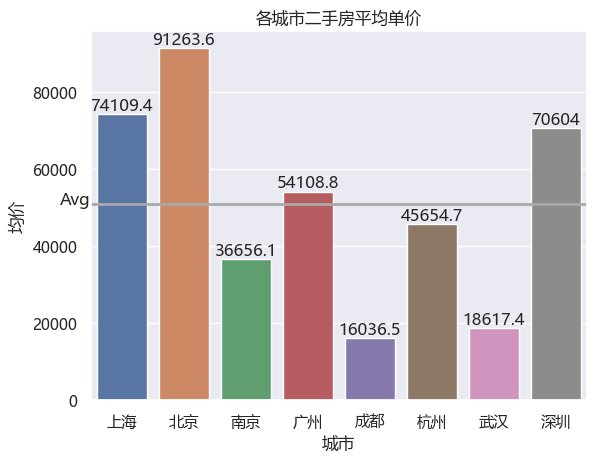

全国二手房平均单价为：50881


In [14]:
ax = sns.barplot(x='城市', y='均价', data=tmp)
ax.bar_label(ax.containers[0])
# for index, row in tmp.iterrows():
#     ax.text(row.城市, row.单价, row.单价, color='white', ha='center')
plt.axhline(y=tmp.均价.mean(),ls="-", lw=2, c="darkgrey")
plt.text(-1,tmp.均价.mean(),"Avg")
plt.title('各城市二手房平均单价')
plt.show()
print(f'全国二手房平均单价为：{round(tmp.均价.mean())}')

小结：一线城市及超一线城市中二手房价最高的是北京,最低的二手房价是成都，北上广深的二手房价均超过了全国二手房价格。

那个城市等级的二手房平均单价更高？

In [15]:
tmp_grad = df.groupby('城市等级')['单价'].mean().reset_index(name='均价')
tmp_grad['均价'] = round(tmp_grad['均价'],2)
tmp_grad

,城市等级,均价
0,一线,70895.06
1,准一线,29090.76


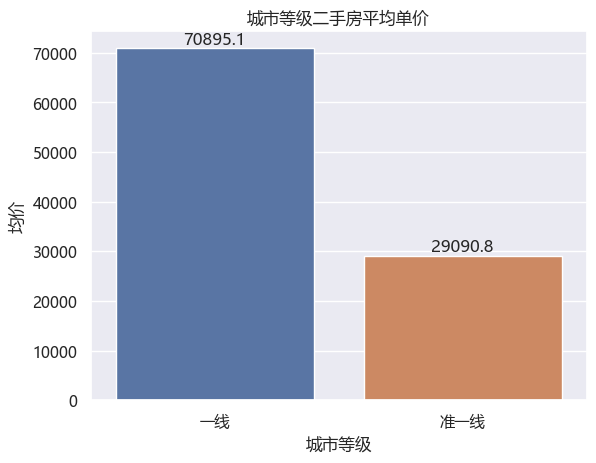

In [16]:
ax = sns.barplot(x='城市等级', y='均价', data=tmp_grad)
ax.bar_label(ax.containers[0])
plt.title('城市等级二手房平均单价')
plt.show()


In [17]:
df.groupby('城市等级')['城市'].count()

城市等级
一线     13457
准一线    17508
Name: 城市, dtype: int64

小结：二手房中一线城市的平均价远远的高于准一线，其中一线城市的二手房均价为70895.06元，高出了准一线城市41804.3元。

除了城市之外，其它影响二手房价的因素

In [18]:
## 各城市不同小区的二手房单价分布
tmp_com = df.groupby(['城市','小区']).单价.mean().reset_index(name='均价')
tmp_com

,城市,小区,均价
0,上海,TODTOWN天荟悦,91864.00
1,上海,UNICITY万科天,83698.00
2,上海,万业紫辰苑,53323.75
3,上海,万寿新村青浦,30919.60
4,上海,万峰梦湖苑,73541.50
...,...,...,...
9481,深圳,龙岗大道1号,52000.00
9482,深圳,龙岸花园,56000.00
9483,深圳,龙珠花园,37800.00
9484,深圳,龙祥苑,68000.00


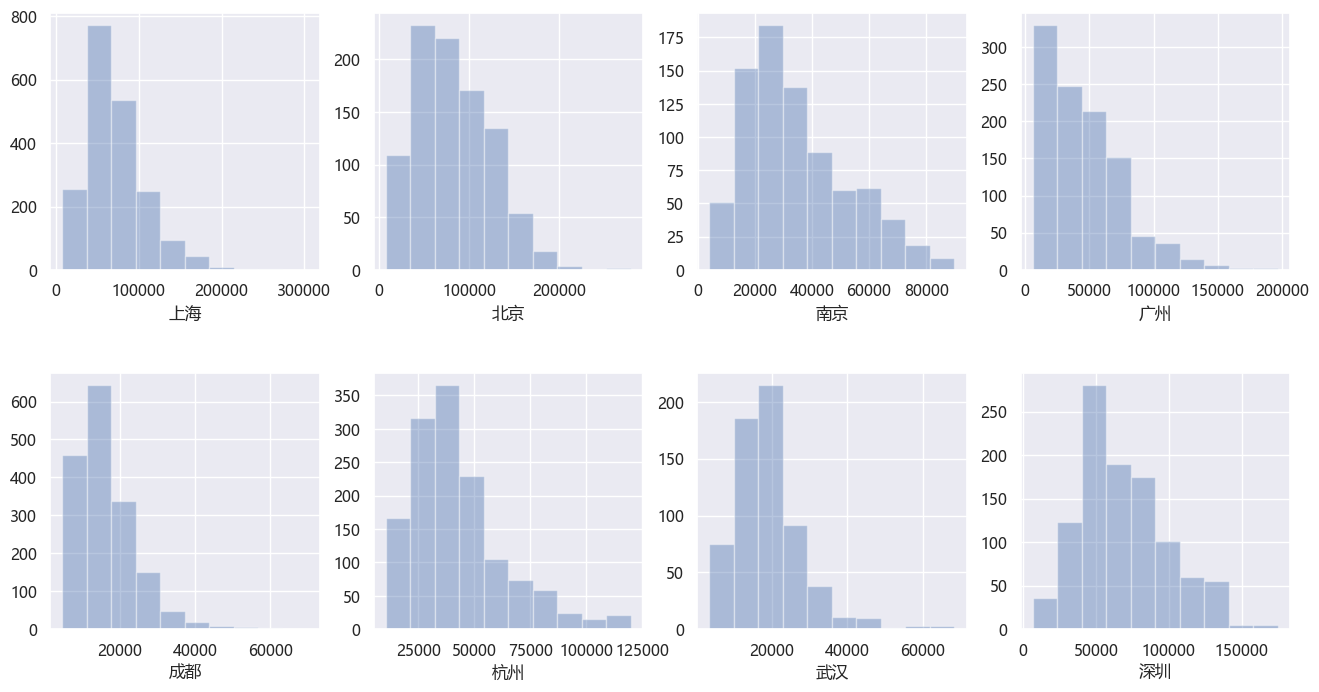

In [19]:
fig = plt.figure(figsize=(16,8))
ax = fig.subplots(2,4)
def plot_hist(index1, index2, city,bins=10):
    tmp_com_c = tmp_com[['城市','均价']]
    tmp_com_ct = tmp_com_c[tmp_com_c['城市']==city]
    sns.distplot(tmp_com_ct['均价'],bins=10,ax=ax[index1][index2],kde=False,axlabel=city)
    # 设置子图之间的纵向间隔
    fig.subplots_adjust(hspace=0.4) 

cities = df['城市'].unique()
for index1,city1 in enumerate(cities.reshape(2,4)):
    for index2, city in enumerate(city1):
        plot_hist(index1, index2, city)


小结：不同小区的二手房均价也不同，每个城市都存在单价极高或极低的小区

In [20]:
## 各城市不同楼层位置的二手房单价分布
tmp_layer = df.groupby(['城市','楼层位置']).单价.mean().reset_index(name='均价')
tmp_layer['均价'] = round(tmp_layer['均价'],2)
tmp_layer.head(5)

,城市,楼层位置,均价
0,上海,中层,75195.08
1,上海,低层,81171.42
2,上海,底层,62115.70
3,上海,顶层,64653.77
4,上海,高层,75362.39


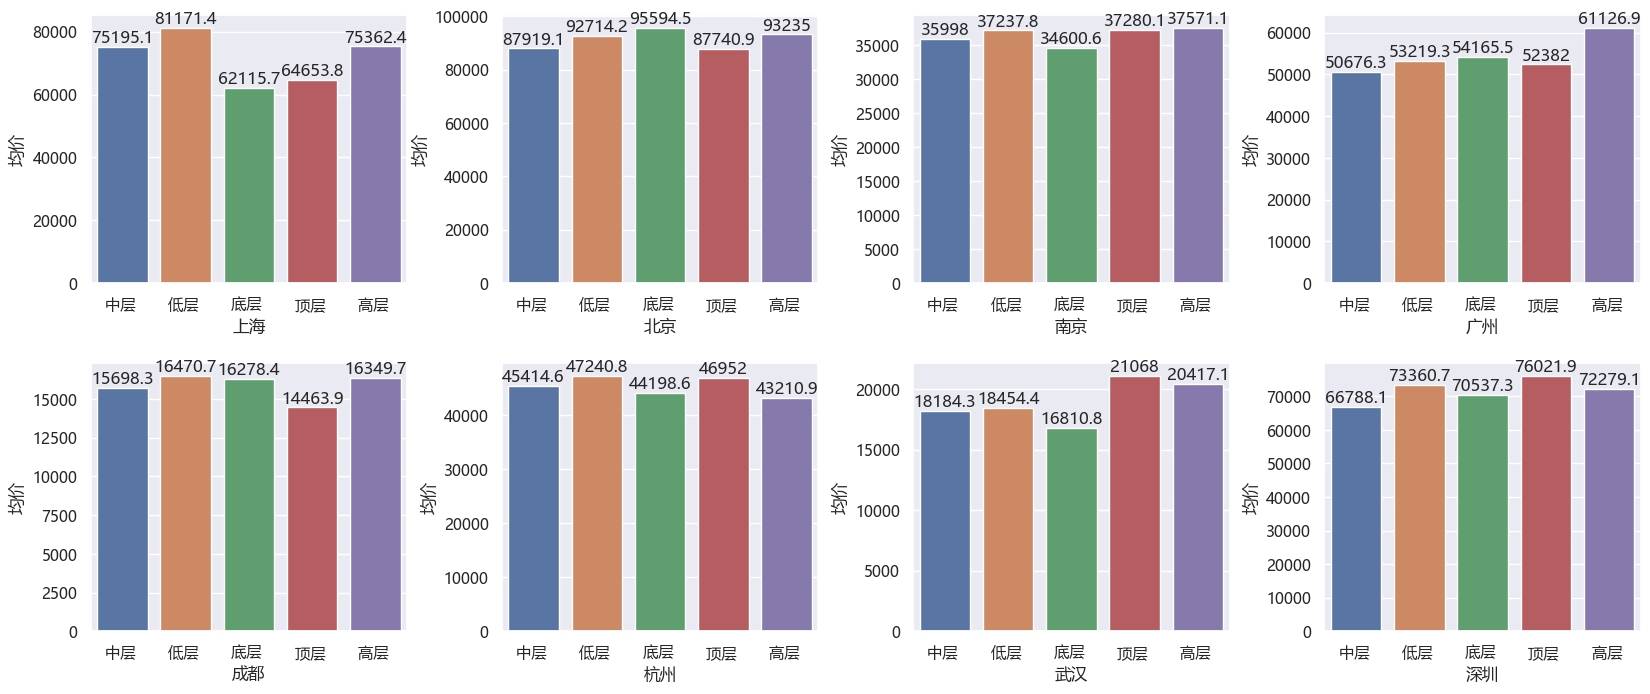

In [21]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(2,4)
def plot_bar(index1, index2, city):
    tmp_layer_c = tmp_layer[tmp_layer['城市']==city]
    sn = sns.barplot(x='楼层位置',y = '均价',data=tmp_layer_c, ax=ax[index1][index2])
    sn.set(xlabel=city)
    sn.bar_label(sn.containers[0])
    # 设置子图之间的纵向间隔
    fig.subplots_adjust(hspace=0.3,wspace=0.3) 

cities = df['城市'].unique()
for index1,city1 in enumerate(cities.reshape(2,4)):
    for index2, city in enumerate(city1):
        plot_bar(index1, index2, city)

小结：同一城市中不同楼层二手房的均价不同，且北京的各个楼层的均价是最高的，同时不难看出低层和高层二手房均价较高。由于底层潮湿，高层夏季炎热的特性，导致底层和顶层二手房均价较低，符合实际情况。

In [22]:
# 各城市不同楼层位置的二手房单价分布

tmp_t = df.groupby(['城市','朝向']).单价.mean().reset_index(name='均价')
tmp_t['均价'] = round(tmp_t['均价'],2)
tmp_t.head(10)

,城市,朝向,均价
0,上海,东北向,84491.25
1,上海,东南向,91469.17
2,上海,东向,101363.52
3,上海,东西向,104633.00
4,上海,北向,78663.13
5,上海,南北向,66589.16
6,上海,南向,76318.77
7,上海,西北向,88934.75
8,上海,西南向,108227.87
9,上海,西向,85324.05


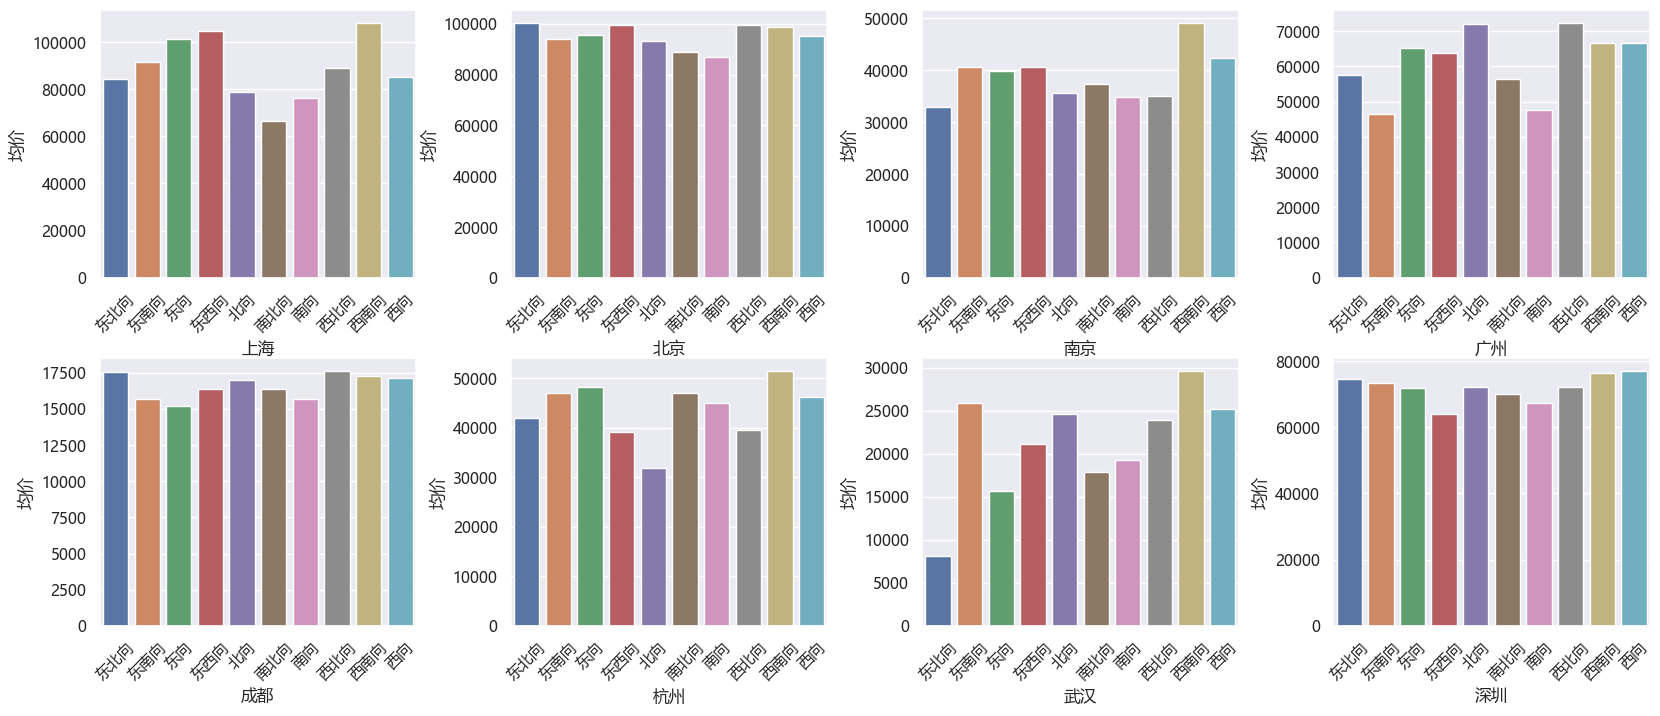

In [23]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(2,4)
def plot_bar(index1, index2, city):
    tmp_t_c = tmp_t[tmp_t['城市']==city]
    sn = sns.barplot(x='朝向',y = '均价',data=tmp_t_c, ax=ax[index1][index2])
    sn.set_xticklabels(labels =tmp_t_c['朝向'], rotation=45)
    sn.set(xlabel=city)
    # sn.bar_label(sn.containers[0])
    # 设置子图之间的纵向间隔
    fig.subplots_adjust(hspace=0.3,wspace=0.3) 
cities = df['城市'].unique()
for index1,city1 in enumerate(cities.reshape(2,4)):
    for index2, city in enumerate(city1):
        plot_bar(index1, index2, city)

小结：不同朝向，二手房屋也会存在着不同差别

In [24]:
# 建房时间不同的二手房的单价变化趋势
tmp_btime = df.groupby(['城市','建房时间']).单价.mean().reset_index(name='均价')
tmp_btime['均价'] = round(tmp_btime['均价'],2)
tmp_btime.head(10)

,城市,建房时间,均价
0,上海,1931,138804.00
1,上海,1933,179788.00
2,上海,1940,162502.00
3,上海,1953,86795.00
4,上海,1954,50769.00
5,上海,1955,88480.30
6,上海,1958,67981.75
7,上海,1959,56850.00
8,上海,1960,148471.00
9,上海,1966,116460.50


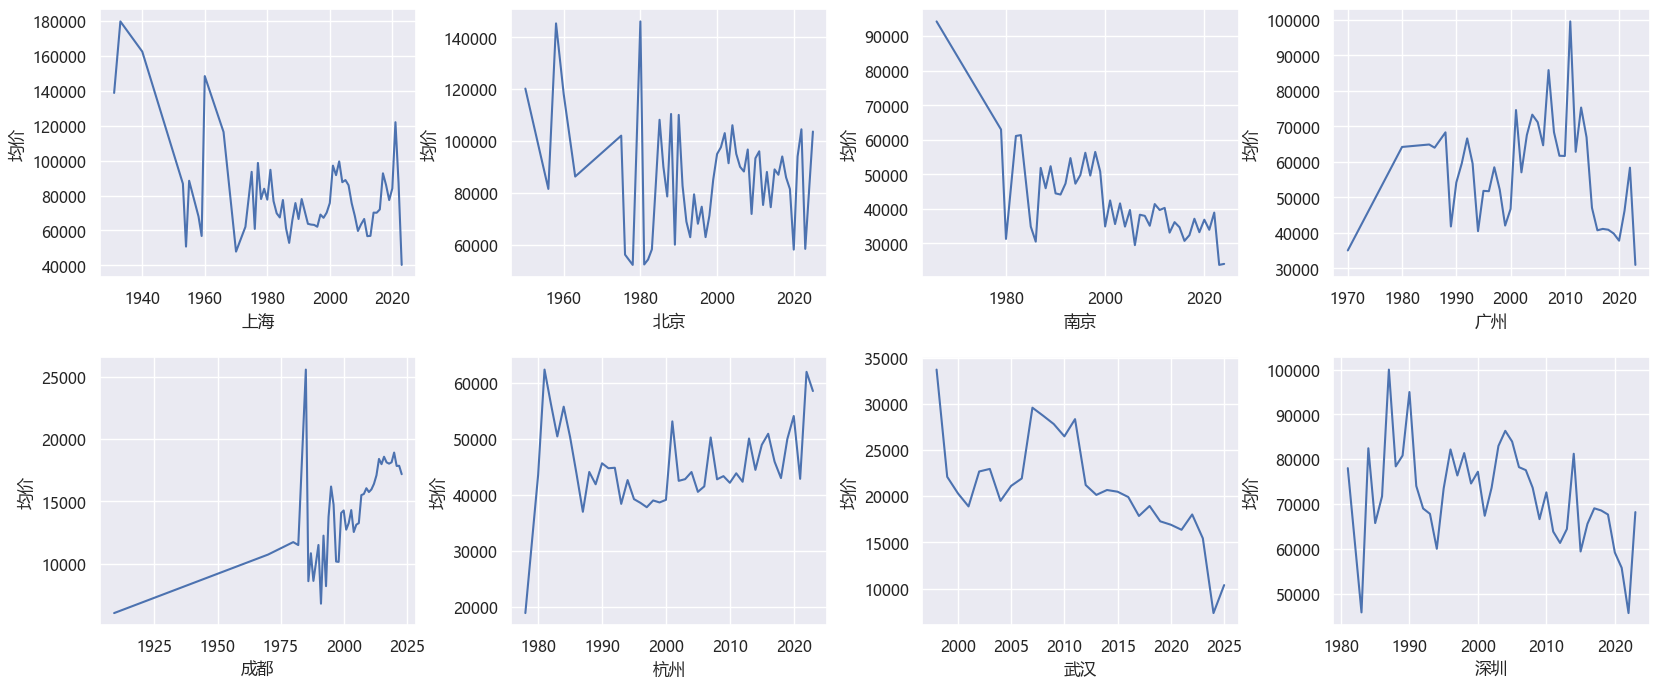

In [25]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(2,4)
#返回颜色种类，超过了自动循
def plot_line(index1, index2, city):
    
    tmp_btime_c = tmp_btime[tmp_btime['城市']==city]
    sn = sns.lineplot(x='建房时间',y = '均价',data=tmp_btime_c, ax=ax[index1][index2])

    sn.set(xlabel=city)
    # sn.bar_label(sn.containers[0])
    # 设置子图之间的纵向间隔
    fig.subplots_adjust(hspace=0.3,wspace=0.3) 
cities = df['城市'].unique()
for index1,city1 in enumerate(cities.reshape(2,4)):
    for index2, city in enumerate(city1):
        plot_line(index1, index2, city)

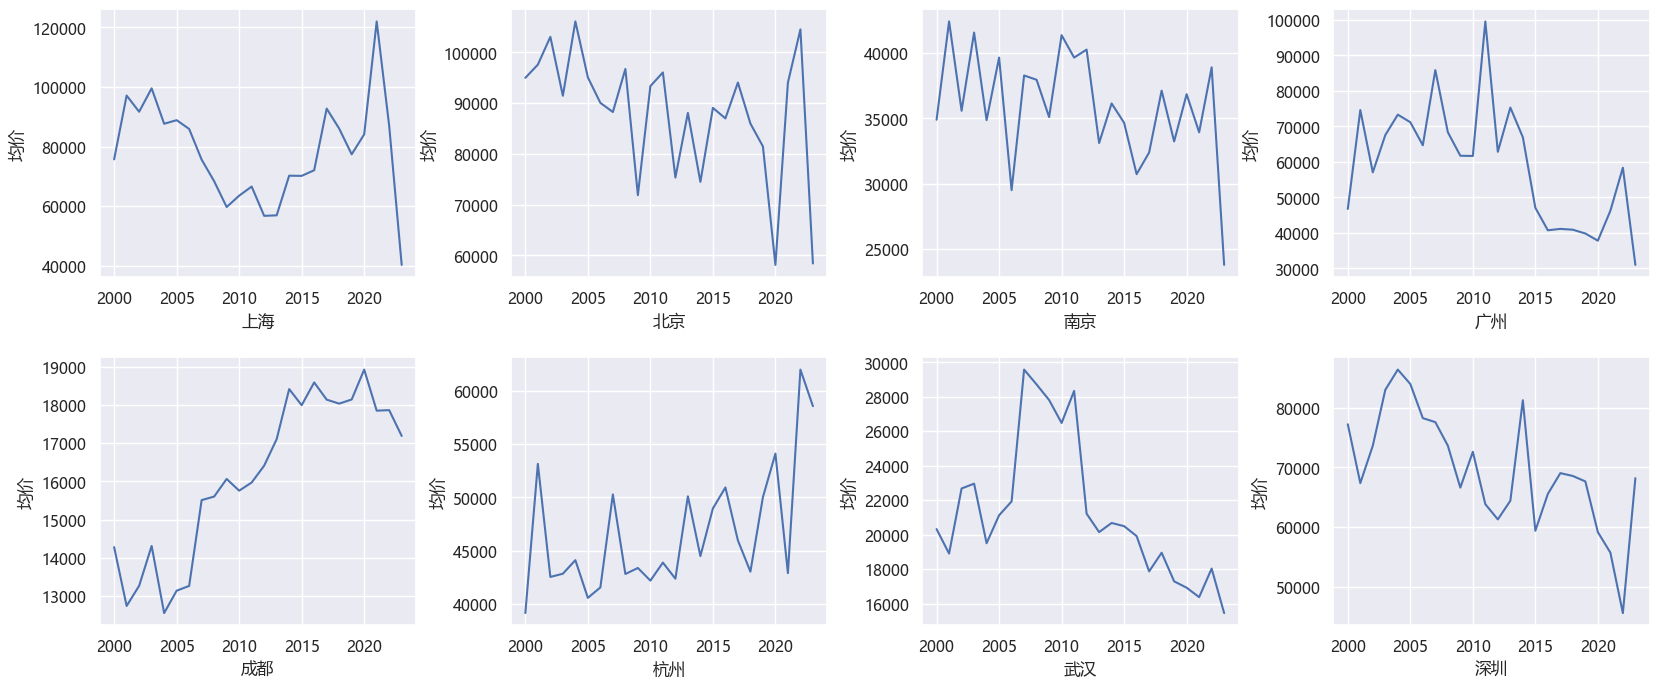

In [26]:
# 2000年之后的房价
tmp_btime_2000 = tmp_btime.query('2000 <= 建房时间 <= 2023')
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(2,4)
#返回颜色种类，超过了自动循
def plot_line(index1, index2, city):
    
    tmp_btime_2000_c = tmp_btime_2000[tmp_btime_2000['城市']==city]

    sn = sns.lineplot(x='建房时间',y = '均价',data=tmp_btime_2000_c, ax=ax[index1][index2])

    sn.set(xlabel=city)
    # sn.bar_label(sn.containers[0])
    # 设置子图之间的纵向间隔
    fig.subplots_adjust(hspace=0.3,wspace=0.3) 
cities = df['城市'].unique()
for index1,city1 in enumerate(cities.reshape(2,4)):
    for index2, city in enumerate(city1):
        plot_line(index1, index2, city)

小结：从整体时间上来看可以看出北上南京和武汉的老房子均高于2000年之后修的，但这种老房子一般是像北京的四合院和上海的小洋楼，以及一些老房子的占地面积大或者位置好。

从2013-2023年可以看出，在疫情初的时候整体二手房价低迷。但除了成都二手房价持续走低外，其它城市在疫情中这段时间房价有所回暖，但除了深圳之外的其它城市在2022年开始一直低迷。同时也不难看出武汉的房价从2013-2023年武汉房价持续走低

In [27]:
# 户型对房价的影响
tmp_type = df.groupby(['城市','户型']).单价.mean().reset_index(name='均价')
tmp_type['均价'] = round(tmp_type['均价'],2)
tmp_type.head(10)

,城市,户型,均价
0,上海,1室0厅,73519.23
1,上海,1室1厅,67190.28
2,上海,1室2厅,80415.97
3,上海,2室0厅,62117.57
4,上海,2室1厅,62336.36
5,上海,2室2厅,70454.59
6,上海,3室0厅,57504.67
7,上海,3室1厅,59436.92
8,上海,3室2厅,83208.53
9,上海,3室3厅,67373.50


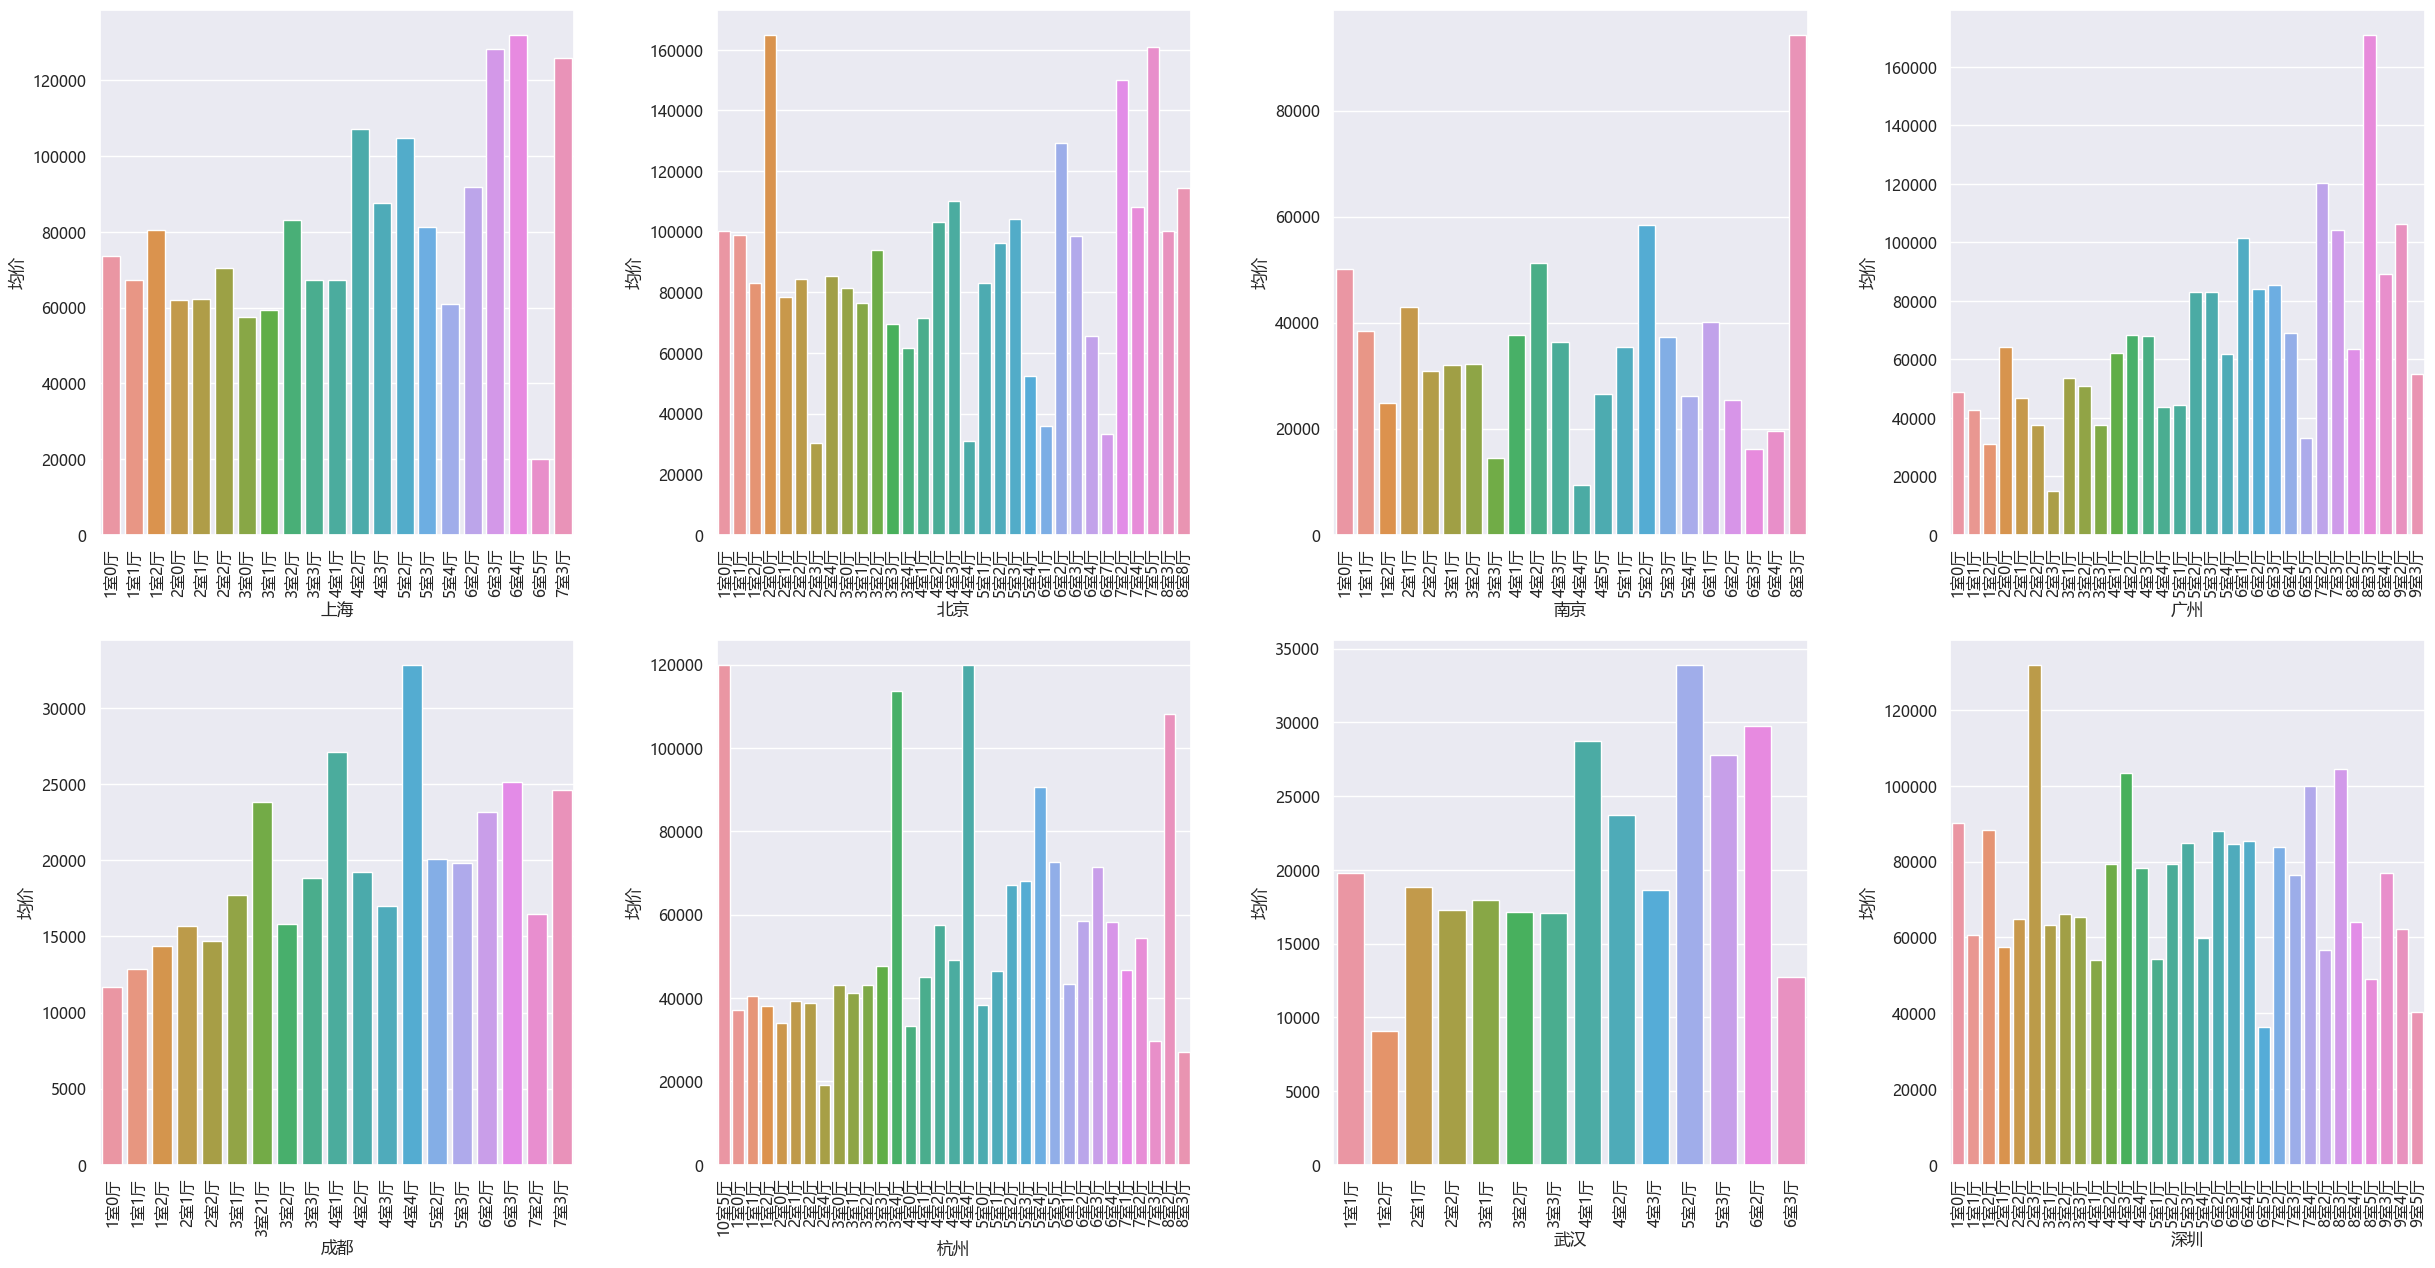

In [28]:
fig = plt.figure(figsize=(30,15))
ax = fig.subplots(2,4)
def plot_bar(index1, index2, city):
    tmp_type_c = tmp_type[tmp_type['城市']==city]
    sn = sns.barplot(x ='户型',y = '均价',data=tmp_type_c, ax=ax[index1][index2])
    sn.set_xticklabels(labels =tmp_type_c['户型'], rotation=90)
    sn.set(xlabel=city)
    # sn.bar_label(sn.containers[0])
    # 设置子图之间的纵向间隔
    fig.subplots_adjust(hspace=0.2,wspace=0.3) 
cities = df['城市'].unique()
for index1,city1 in enumerate(cities.reshape(2,4)):
    for index2, city in enumerate(city1):
        plot_bar(index1, index2, city)

In [29]:
cities = df['城市'].unique()
for city in cities:
    num = df[df['城市'] == city].户型.nunique()
    print(f'{city}:的户型有{num}种')

上海:的户型有21种
北京:的户型有31种
南京:的户型有22种
广州:的户型有30种
成都:的户型有19种
杭州:的户型有33种
武汉:的户型有14种
深圳:的户型有31种


小结：户型对二手房价格也有所影响，可以发现户型最多的城市是北京和深圳，最少的是成都，不同城市所受欢迎的户型也大致不同。

### 总结1
- 不同城市的二手房房源单价价格差别较大，在所统计的8个城市中，北京市的二手房单价最高，成都市的二手房房源单价最低
- 一线城市与准一线城市的二手房单价相差较大
- 除了城市的不同以及城市等级的不同，影响二手房单价的因素还有 小区的不同，楼房所处楼层的不同，房屋朝向、不同建房时间等因素

### 房价预测

In [30]:
df.sample(5)

,房源标题,城市,城市等级,小区,户型,面积,楼层位置,朝向,建房时间,楼房位置,单价,总价
27095,"武汉CBD 双墩口 ,汉西路 ,崇仁路小學, 惊爆折扣价",武汉,准一线,兴华尚都国际,4室2厅,149.00,中层,南北向,2019,汉西,22953.0,342.00
29949,"急售,小区必看好房,业主价格好谈,住家大三房,有意联系",深圳,一线,锦上花家园,3室2厅,85.06,中层,东北向,2003,黄贝岭,52300.0,444.90
24973,2号线7号线 边户南北通透 依山傍水户型 精装修现房领包入住,武汉,准一线,山海观,3室2厅,97.00,低层,南北向,2020,盘龙城,10090.0,97.88
22938,新上寰宇天下 三开间朝南 高楼层 正对小区景观 诚心卖,杭州,准一线,中海寰宇天下,2室2厅,89.43,中层,南北向,2014,滨盛,53673.0,480.00
11998,"原装电梯,三荣大厦,中高楼层,低密度有赠送户型方正",广州,一线,三荣大厦,3室2厅,104.08,中层,东向,2005,淘金,57167.0,595.00


从表中发现可以发现存在一些冗余的特征，如总价=面积*单价，一个城市小区的名字是唯一的，因此小区和楼房位置是冗余的，房源标题是对房子信息的补充或者总结，因此选择特征为城市、城市等级、小区、户型、面积、流程位置、朝向、建房时间，对单价进行预测

In [31]:
df_new = df.drop(columns=['房源标题','楼房位置','总价'],axis=1)

In [32]:
#对户型进行拆分 并作为特征之一
df_new['室'] = df_new['户型'].apply(lambda x:x.split('室')[0])
df_new['厅'] = df_new['户型'].apply(lambda x:x.split('室')[1].split('厅')[0])
df_new.head()

,城市,城市等级,小区,户型,面积,楼层位置,朝向,建房时间,单价,室,厅
0,上海,一线,东方剑桥,2室2厅,103.87,低层,南向,2000,142485.0,2,2
1,上海,一线,大同花园南区,2室2厅,108.91,中层,南向,1999,127628.0,2,2
2,上海,一线,海滨八村,2室1厅,60.73,顶层,南向,1986,33591.0,2,1
3,上海,一线,天山星城,3室2厅,105.88,低层,南向,2006,112391.0,3,2
4,上海,一线,乐山大楼,2室1厅,62.28,中层,南向,1991,118497.0,2,1


In [34]:
# 删除户型
del df_new['户型']
# 将文本信息转化数值型
## 城市等级
a = {}
for index, level in enumerate(df_new['城市等级'].unique()):
    a[level] = index
print(a)
df_new['城市等级'] = df_new['城市等级'].map(a)

## 城市
cities = {}
for index, city in enumerate(df_new['城市'].unique()):
    cities[city] = index
df_new['城市'] = df_new['城市'].map(cities)

## 楼层位置
layers = {}
for index, layer in enumerate(df_new['楼层位置'].unique()):
    layers[layer] = index
df_new['楼层位置'] = df_new['楼层位置'].map(layers)

## 朝向
towards = {}
for index, toward in enumerate(df_new['朝向'].unique()):
    layers[toward] = index
df_new['朝向'] = df_new['朝向'].map(layers)

## 小区
Communities = {}
for index, Community in enumerate(df_new['小区'].unique()):
    Communities[Community] = index
df_new['小区'] = df_new['小区'].map(Communities)

"""
或者使用preprocessing中的labelencoder()
"""

{'一线': 0, '准一线': 1}


,城市,城市等级,小区,面积,楼层位置,朝向,建房时间,单价,室,厅
0,0,0,0,103.87,0,0,2000,142485.0,2,2
1,0,0,1,108.91,1,0,1999,127628.0,2,2
2,0,0,2,60.73,2,0,1986,33591.0,2,1
3,0,0,3,105.88,0,0,2006,112391.0,3,2
4,0,0,4,62.28,1,0,1991,118497.0,2,1


由于老房子的价格年代久远，在二手房市场只是针对极少数客户，因此只对2000年之后的二手房进行预测

In [35]:
df_new = df_new.query('建房时间>=2000')
df_new['房龄'] = df_new['建房时间']-df_new['建房时间'].min()
df_new.shape

,城市,城市等级,小区,面积,楼层位置,朝向,建房时间,单价,室,厅,房龄
0,0,0,0,103.87,0,0,2000,142485.0,2,2,0
3,0,0,3,105.88,0,0,2006,112391.0,3,2,6
5,0,0,5,151.80,1,0,2003,132345.0,3,2,3
7,0,0,7,133.18,0,0,2006,135155.0,2,2,6
8,0,0,8,159.09,0,0,2003,108743.0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...
32528,7,0,8961,70.37,0,8,2004,100200.0,2,2,4
32529,7,0,8707,87.41,3,7,2018,45800.0,3,2,18
32530,7,0,8841,89.63,1,0,2009,103000.0,3,2,9
32531,7,0,9351,80.68,3,5,2008,81308.0,3,2,8


array([[<Axes: title={'center': '城市'}>, <Axes: title={'center': '城市等级'}>,
        <Axes: title={'center': '小区'}>],
       [<Axes: title={'center': '面积'}>, <Axes: title={'center': '楼层位置'}>,
        <Axes: title={'center': '朝向'}>],
       [<Axes: title={'center': '建房时间'}>, <Axes: title={'center': '单价'}>,
        <Axes: title={'center': '房龄'}>]], dtype=object)

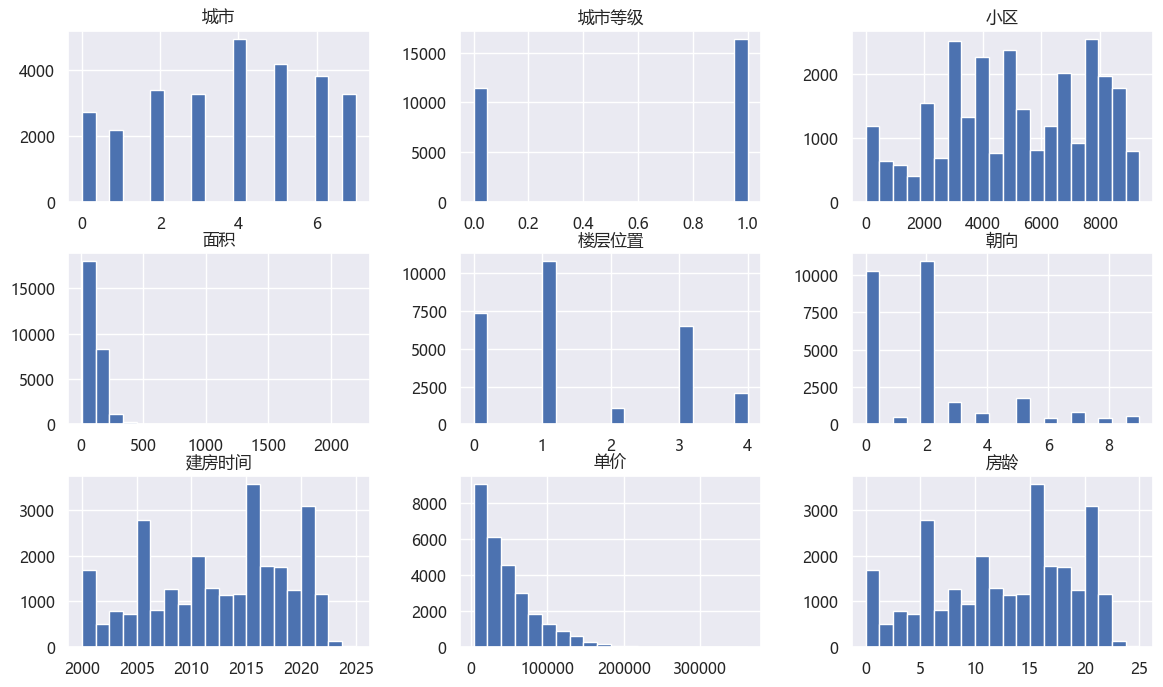

In [36]:
# 可视化各个特征的分布
df_new.hist(bins = 20, figsize=(14,8))

In [37]:
y = df_new['单价']
del df_new['单价']
X = df_new

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.ensemble import  VotingRegressor,RandomForestRegressor
from sklearn.model_selection import KFold

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33)

In [ ]:
print(y_train.shape)
print(y_test.shape)

((20892,), (6964,))

In [140]:
metric = pd.DataFrame([], columns=['score_training', 'score_testing', 'cross_vail'])

In [141]:
def train_test(model,x_train, y_train, x_test, y_test, cv=10):
    """
    model:"模型";
    x_train:"训练集";
    y_train:"train_true";
    x_test:"训练集";
    y_test:"test_true";
    cv:"kfold",
    """
    #模型训练
    model.fit(x_train, y_train)

    # 训练集
    score_train = round(model.score(x_train,y_train),2)
    # 测试集
    score_test = round(model.score(x_test,y_test),2)
    # 交叉验证
    cv_ = cross_val_score(estimator = model, X = x_train, y = y_train, cv = cv)
    cross_score = round(cv_.mean(),2)
    metric.loc[model_name] = [score_train, score_test, cross_score ]

#### 随机深林回归

In [142]:
RF = RandomForestRegressor()
train_test(RF,x_train, y_train, x_test, y_test)

#### svm回归模型

In [171]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
from sklearn.svm import SVR

sc_X = StandardScaler()
sc_y = StandardScaler()

## 训练集
x_train = sc_X.fit_transform(x_train)
y_traincp = pd.DataFrame(y_train)
y_traincp = sc_y.fit_transform(y_train1)

## 测试集
x_test = sc_X.fit_transform(x_test)
y_testcp = pd.DataFrame(y_test)
y_testcp = sc_y.fit_transform(y_testcp)

svr = SVR(kernel = 'rbf', gamma = 'scale')
train_test(svr, x_train, y_traincp.ravel(), x_test, y_testcp.ravel())

#### 多层感知机

In [178]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()
train_test(clf, x_train, y_traincp.ravel(), x_test, y_testcp.ravel())

#### BaggingRegressor

In [188]:
from sklearn.ensemble import BaggingRegressor
BG = BaggingRegressor()
train_test(BG, x_train, y_traincp.ravel(), x_test, y_testcp.ravel())

In [237]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=1.0)
train_test(rd, x_train, y_traincp.ravel(), x_test, y_testcp.ravel())

#### 选取两个score得分靠前的模型集成

In [196]:
ensemble = VotingRegressor(estimators=[('RF', RF), ('BG', BG)],weights=[2,1])
train_test(ensemble, x_train, y_train, x_test, y_test)

In [242]:
metric

,score_training,score_testing,cross_vail
RandomForestRegressor,0.96,0.76,0.74
SVR,0.63,0.61,0.60
MLPRegressor,0.66,0.64,0.62
BaggingRegressor,0.95,0.64,0.71
VotingRegressor,0.96,0.67,0.73


### 总结2
1. 以上模型在数据集的子集(建筑时间>2000)表现不好的原因如下：
    -  未对数据集中的离群值进行处理，将面积大于500的和最小面积剔除，总价高于6000以上的删除。
    - 未充分利用房源标题信息，应该将房源标题信息中的装修、电梯、车位等信息提取作为特征之一。

2. 后续改进:
    - 充分的利用房源标题信息
    - 对离群值进行处理
    - 选择更适合的模型以提高模型的R2
    - 选择建房时间更为集中的如2005-2022年

<Axes: >

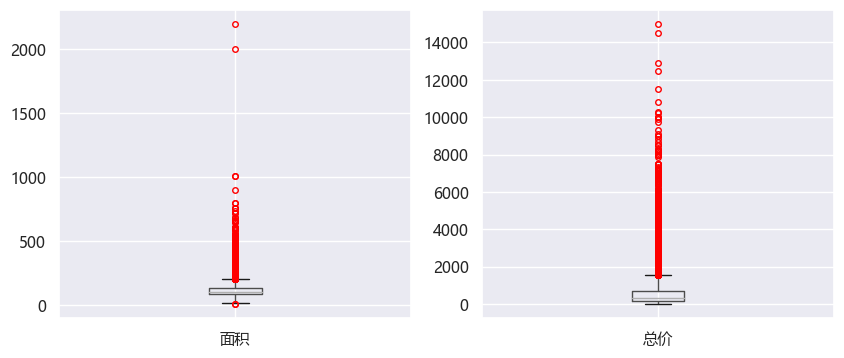

In [228]:
df_ = df.query('建房时间>=2000')
fig,ax = plt.subplots(1,2,figsize=(10,4))
df_.boxplot(column='面积',flierprops={'markeredgecolor':'red','markersize':4},ax=ax[0])
df_.boxplot(column='总价',flierprops= {'markeredgecolor':'red','markersize':4},ax=ax[1])

### referring:
- https://zhuanlan.zhihu.com/p/182935559
- https://www.heywhale.com/home/user/profile/5f4fa4cd4374bb00365df5a7/overview
- https://scikit-learn.org/stable/